In [1]:
import warnings

import numpy

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
import sys
import numpy as np
from keras.models import model_from_json
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import itertools
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras

from keras import models
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from keras.layers import Conv2D, ZeroPadding2D, Activation, concatenate, Dropout
from keras.models import Model
# from keras.layers import
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import RMSprop
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras import backend as K
from keras.backend import set_session
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [2]:
forg_groups = []
org_groups = []

In [3]:
#genuine=("C:/Users/DELL/Desktop/path1")
genuine = ("D:/path1")

# genuine_images_path = ("D:/imsave/genuine")
# forged_images_path = ("D:/imsave/forged")

In [4]:
dir_list = next(os.walk(genuine))[1]
print("dir_list",dir_list)
dir_list.sort()

dir_list ['001', '002']


In [5]:
for directory in dir_list:
    images_1 = os.listdir(genuine + "/" + directory)
    images_1.sort()
    images_1 = [genuine + "/" + directory + '/' + x for x in  images_1]
    # print("images=",len(images_1))
    forg_groups.append(images_1[3:])  # First 30 signatures in each folder are forrged
    org_groups.append(images_1[3:])
    forg_lengths = [len(x) for x in forg_groups]
     #print("forg_lengths",forg_lengths)


In [6]:
#forged = ("C:/Users/DELL/Desktop/path2")
forged = ("D:/path2")
# forged = ("C:/Users/DELL/Desktop/for/forged")

In [7]:
dir_list = next(os.walk(forged))[1]
dir_list.sort()
print("dir_list.sort()",dir_list)

dir_list.sort() ['001', '002']


In [8]:
for directory in dir_list:
    #print("directory", directory)
    images_2 = os.listdir(forged + "/" + directory)
    images_2.sort()
    images_2 = [forged + "/" + directory + '/' + x for x in images_2]
    #print("images_2",images_2)
    #print("images_2=", len(images_2))
    forg_groups.append(images_2[3:])
    org_groups.append(images_2[:3])
      # First 30 signatures in each folder are forrged
    #print("forg_groups", len(forg_groups))
    org_lengths = [len(x) for x in org_groups]
    #print("org_lengths", org_lengths)
# # Quick check to confirm we have data of all the 160 individuals
# print("orig_groups",len(org_groups))
# print("forg_groups",len(forg_groups))
# print("orig_groups",org_groups)
# print("forg_groups",forg_groups)
forg_lengths = [len(x) for x in forg_groups]
# print("forg_lengths",forg_lengths)
# # Quick check to confirm that there are 24 Genuine signatures for each individual
# print("orig_lengths=1",org_lengths)
# # Quick check to confirm that there are 30 Forged signatures for each individual
# print("forg_lengths=1",forg_lengths)

In [9]:
for i in (org_groups):
    print(i)
# forg_groups[0]

['D:/path1/001/H-S-1-F-1.jpeg', 'D:/path1/001/H-S-1-F-2.jpeg', 'D:/path1/001/H-S-1-F-2.tif']
['D:/path1/002/H-S-1-F-5.jpeg', 'D:/path1/002/H-S-1-F-5.jpg', 'D:/path1/002/H-S-1-F-5.tif']
['D:/path2/001/H-S-1-F-0.tif', 'D:/path2/001/H-S-1-F-10.tif', 'D:/path2/001/H-S-1-F-11.tif']
['D:/path2/002/H-S-1-F-5.tif', 'D:/path2/002/H-S-1-F-6.tif', 'D:/path2/002/H-S-1-F-8.tif']


In [10]:
orig_train, orig_test, forg_train, forg_test = train_test_split(org_groups, forg_groups, test_size=0.2, random_state=0)
orig_train, orig_val, forg_train, forg_val = train_test_split(orig_train, forg_train, test_size=0.25, random_state=0)
# orig_test, forg_test = org_groups, forg_groups
# orig_val, forg_val =   orig_test, forg_test
# print("orig_train",orig_train)
# print("orig_test",orig_test)
# print("forg_train",forg_train)
# print("forg_test",forg_test)


In [11]:
print(len(orig_train), len(orig_val), len(orig_test))

2 1 1


In [12]:
img_h, img_w = 155, 220

In [13]:
forge = []
org=[]

In [14]:
for file in os.listdir(genuine):
    for i in os.listdir(genuine+'/'+file):
        org.append(genuine+'/'+file+'/'+i)
print(org[0])

D:/path1/001/B-S-1-F-07.tif


In [15]:
for file in os.listdir(forged):
    for i in os.listdir(forged+'/'+file):
        forge.append(forged+'/'+file+'/'+i)
print(forge[0])

D:/path2/001/H-S-1-F-0.tif


In [16]:
def visualize_sample_signature():
    '''Function to randomly select a signature from train set and
    print two genuine copies and one forged copy'''

    fig, (ax1, ax2) = plt.subplots(1, 3)
#     k = np.random.randint(len(orig_train))
#     print("k==",k)
    orig_img_names = [org[0]]
    print("orig_img_names=",orig_img_names)
    forg_img_name = [forge[0]]
    print("forg_img_name=",forg_img_name)
    orig_img1 = cv2.imread(orig_img_names[0], 0)
    #orig_img2 = cv2.imread(orig_img_names[1], 0)
    forg_img = plt.imread(forg_img_name[0], 0)
    orig_img1 = cv2.resize(orig_img1, (img_w, img_h))
    #orig_img2 = cv2.resize(orig_img2, (img_w, img_h))
    forg_img = cv2.resize(forg_img, (img_w, img_h))
    ax1.imshow(orig_img1, cmap='gray')
    #ax2.imshow(orig_img2, cmap='gray')
    ax2.imshow(forg_img, cmap='gray')
    ax1.set_title('Genuine Copy')
    ax1.axis('off')

#     ax2.set_title('Genuine Copy')
#     ax2.axis('off')
    ax2.set_title('Forged Copy')
    ax2.axis('off')
#     fig.savefig("D:/imsave")
    #return ax1, ax2, ax3


In [17]:

#visualize_sample_signature()

In [18]:

#visualize_sample_signature()

In [19]:
def generate_batch(orig_groups, forg_groups, batch_size=16):
    '''Function to generate a batch of data with batch_size number of data points
    Half of the data points will be Genuine-Genuine pairs and half will be Genuine-Forged pairs'''
    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []

        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have
        # 24 choose 2 = 276 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 300 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 120 * 276 = 33120
        # Total number of Genuine-Forged pairs = 120 * 300 = 36000
        # Total no. of data points = 33120 + 36000 = 69120
        for orig, forg in zip(org_groups, forg_groups):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            #print("orig_pairs=", orig_pairs)

            for i in range(len(forg)):
                forg_pairs.append(forg)
        # print("forg_pairs=", forg_pairs)
        # print("orig_pairs=", orig_pairs)
        # print("orig, forg",orig, forg)
        # print("orig_groups=",orig_groups)
        # print("forg_groups=",forg_groups)
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1] * len(orig_pairs)
        gen_for_labels = [0] * len(forg_pairs)

        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)

        # Note the lists above contain only the image names and
        # actual images are loaded and yielded below in batches
        # Below we prepare a batch of data points and yield the batch
        # In each batch we load "batch_size" number of image pairs
        # These images are then removed from the original set so that
        # they are not added again in the next batch.

        k = 0
        pairs = [np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]
        targets = np.zeros((batch_size,))
       # print("all_pairs",all_pairs)
        for ix, pair in enumerate(all_pairs):
              #print("pair===",pair)
            img1 = cv2.imread(pair[0], 0)
              #print("img1=",img1)
            img2 = cv2.imread(pair[1], 0)
            img1 = cv2.resize(img1, (img_w, img_h))
            img2 = cv2.resize(img2, (img_w, img_h))
            img1 = np.array(img1, dtype=np.float64)
            img2 = np.array(img2, dtype=np.float64)
            img1 /= 255
            img2 /= 255
            img1 = img1[..., np.newaxis]
            img2 = img2[..., np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]
            k += 1
            if k == batch_size:
                yield pairs, targets
                k = 0
                pairs = [np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]
                targets = np.zeros((batch_size,))


In [20]:
def euclidean_distance(vects):
    '''Compute Euclidean Distance between two vectors'''
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [21]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [22]:
def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))


In [23]:
def create_base_network_signet(input_shape):
    '''Base Siamese Network'''

    seq = Sequential()
    seq.add(Conv2D(96, kernel_size=(11, 11), activation='relu', name='conv1_1', strides=4, input_shape=input_shape))
    seq.add(BatchNormalization(epsilon=1e-06, axis=1, momentum=0.9))
    seq.add(MaxPooling2D((3, 3), strides=(2, 2)))
    seq.add(ZeroPadding2D((2, 2)))

    seq.add(Conv2D(256, kernel_size=(5, 5), activation='relu', name='conv2_1', strides=1,
                   kernel_initializer='glorot_uniform'))
    seq.add(BatchNormalization(epsilon=1e-06, axis=1, momentum=0.9))
    seq.add(MaxPooling2D((3, 3), strides=(2, 2)))
    seq.add(Dropout(0.3))  # added extra
    seq.add(ZeroPadding2D((1, 1)))

    seq.add(Conv2D(384, kernel_size=(3, 3), activation='relu', name='conv3_1', strides=1,
                   kernel_initializer='glorot_uniform'))
    seq.add(ZeroPadding2D((1, 1)))

    seq.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv3_2', strides=1,
                   kernel_initializer='glorot_uniform'))
    seq.add(MaxPooling2D((3, 3), strides=(2, 2)))
    seq.add(Dropout(0.3))  # added extra
    seq.add(Flatten(name='flatten'))
    seq.add(Dense(1024, kernel_regularizer=None, activation='relu'))
    seq.add(Dropout(0.5))

    seq.add(Dense(128, kernel_regularizer=None, activation='relu'))  # softmax changed to relu

    return seq

In [24]:
input_shape = (img_h, img_w, 1)

# network definition
base_network = create_base_network_signet(input_shape)
input_a = Input(shape=(input_shape))
input_b = Input(shape=(input_shape))

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Compute the Euclidean distance between the two vectors in the latent space
distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([processed_a, processed_b])
print("distance", distance)

model = Model(inputs=[input_a, input_b], outputs=distance, name='head_model')
batch_sz = 5
num_train_samples = 10* 1 + 8 * 1
num_val_samples = num_test_samples = 10 * 1 + 8 * 1
num_train_samples, num_val_samples, num_test_samples



distance KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda/Sqrt:0', description="created by layer 'lambda'")


(18, 18, 18)

In [25]:
# compile model using RMSProp Optimizer and Contrastive loss function defined above
rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-7)
model.compile(loss=contrastive_loss, optimizer=rms,metrics=None)


C:\Users\DELL\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [26]:
model.load_weights('FashionMNIST_weights.h5')
model.summary()

Model: "head_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 155, 220, 1) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 155, 220, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 128)          6461084     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           sequential[0][0]        

In [27]:
# def compute_accuracy_roc(predictions, labels, plot_far_frr =False):
#     '''
#     Compute ROC accuracy with a range of thresholds on distances.
#     Plot FAR-FRR curves and P-R curves to monitor performance of model on input set.
#     '''
#     dmax = np.max(predictions)
#     print("dmax=",dmax)
#     dmin = np.min(predictions)
#     print("dmin=",dmin)
#     nsame = np.sum(labels == 1) #similar
#     print("nsame=",nsame)
#     ndiff = np.sum(labels == 0) #different
#     print("ndiff=",ndiff)
#     step = 0.01
#     max_acc = 0
#     best_thresh = -1
#     frr_plot = []
#     far_plot = []
#     pr_plot = []
#     re_plot = []
#     ds = []
#     for d in np.arange(dmin, dmax+step, step):
#         idx1 = predictions.ravel() <= d #guessed genuine
#         idx2 = predictions.ravel() > d #guessed forged
#         tp = float(np.sum(labels[idx1] == 1))
#         tn = float(np.sum(labels[idx2] == 0))
#         fp = float(np.sum(labels[idx1] == 0))
#         fn = float(np.sum(labels[idx2] == 1))
#         print("tp",tp)
#         print("tn",tn)
#         print("fp",fp)
#         print("fn",fn)
# #         tpr = float(np.sum(labels[idx1] == 1)) / nsame
#         print("tpr",tpr)
#         tnr = float(np.sum(labels[idx2] == 0)) / ndiff
#         print("tnr",tnr)
        
        
#         acc = 0.5 * (tpr + tnr)
#         print("acc",acc)
#         pr = tp / (tp + fp)
#         print("pr=",pr)
#         re = tp / (tp + fn)
#         print ('ROC', acc, tpr, tnr)
       
#         if (acc > max_acc):
#             max_acc, best_thresh = acc, d
        
#         #if (fp+tn) != 0.0 and (fn+tp) != 0.0:
#         far = fp / (fp + tn)
#         print("far=",far)
#         frr = fn / (fn + tp)
#         print("frr=",frr)
#         frr_plot.append(frr)
#         pr_plot.append(pr)
#         re_plot.append(re)
#         far_plot.append(far)
#         ds.append(d)
            
    
#     if plot_far_frr:
#         fig = plt.figure(figsize = (10,10))
#         ax = fig.add_subplot(121)
#         ax.plot(ds, far_plot, color = 'red')
#         ax.plot(ds, frr_plot, color = 'blue')
#         ax.set_title('Error rate')
#         ax.legend(['FAR', 'FRR'])
#         ax.set(xlabel = 'Thresholds', ylabel = 'Error rate')
        
#         ax1 = fig.add_subplot(122)
#         ax1.plot(ds, pr_plot, color = 'green')
#         ax1.plot(ds, re_plot, color = 'magenta')
#         ax1.set_title('P-R curve')
#         ax1.legend(['Precision', 'Recall'])
#         ax.set(xlabel = 'Thresholds', ylabel = 'Error rate')
        
#         plt.show()
#     return max_acc, best_thresh

In [28]:
def compute_accuracy_roc(predictions, labels, plot_far_frr=False):
    '''
    Compute ROC accuracy with a range of thresholds on distances.
    Plot FAR-FRR curves and P-R curves to monitor performance of model on input set.
    '''
    dmax = np.max(predictions)
    dmin = np.min(predictions)
    nsame = np.sum(labels == 1)  # similar
    ndiff = np.sum(labels == 0)  # different
    step = 0.01
    max_acc = 0
    best_thresh = -1
    frr_plot = []
    far_plot = []
    pr_plot = []
    re_plot = []
    ds = []
    for d in np.arange(dmin, dmax + step, step):
        idx1 = predictions.ravel() <= d  # guessed genuine
        #print("idx1",idx1)
        idx2 = predictions.ravel() > d  # guessed forged
        #print("idx2",idx2)
        tp = float(np.sum(labels[idx1] == 1))
        tn = float(np.sum(labels[idx2] == 0))
        fp = float(np.sum(labels[idx1] == 0))
        fn = float(np.sum(labels[idx2] == 1))
        #print("tp, tn, fp, fn",tp, tn, fp, fn)
        tpr = float(np.sum(labels[idx1] == 1)) / nsame
        tnr = float(np.sum(labels[idx2] == 0)) / ndiff

        acc = 0.5 * (tpr + tnr)
        pr = tp / (tp + fp)
        re = tp / (tp + fn)
        #print ('ROC', acc, tpr, tnr)

        if (acc > max_acc):
            max_acc, best_thresh = acc, d

        # if (fp+tn) != 0.0 and (fn+tp) != 0.0:
        far = fp / (fp + tn)
        frr = fn / (fn + tp)
        frr_plot.append(frr)
        pr_plot.append(pr)
        re_plot.append(re)
        far_plot.append(far)
        ds.append(d)

    if plot_far_frr:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(121)
        ax.plot(ds, far_plot, color='red')
        ax.plot(ds, frr_plot, color='blue')
        ax.set_title('Error rate')
        ax.legend(['FAR', 'FRR'])
        ax.set(xlabel='Thresholds', ylabel='Error rate')
        ax1 = fig.add_subplot(122)
        ax1.plot(ds, pr_plot, color='green')
        ax1.plot(ds, re_plot, color='magenta')
        ax1.set_title('P-R curve')
        ax1.legend(['Precision', 'Recall'])
        ax.set(xlabel='Thresholds', ylabel='Error rate')
        plt.show()
    return max_acc, best_thresh

In [29]:
def load_and_check_model(weight):
    """
    Print validation Accuracy for all saved weights and choose the best for test set
    (TODO - Perform Ensemble of Weights)
    """
    model.load_weights(weight)

    val_gen = generate_batch(orig_val, forg_val, 1)
    pred, tr_y = [], []
    for i in range(num_val_samples):
        (img1, img2), label = next(val_gen)
        tr_y.append(label)
        pred.append(model.predict([img1, img2])[0][0])

    tr_acc, threshold = compute_accuracy_roc(np.array(pred), np.array(tr_y))
    print("threshold",threshold)
    return tr_acc, threshold

In [30]:
print("       BHSIG260 full dataset with Xavier Initialisation on Uniform Distribution       ")
acc_thresh = []
for i in range(1,27,1):
    acc_thresh.append(load_and_check_model('D:/model2/signet-bhsig260-full-xavier-'+str(i).zfill(3)+'.h5'))
    print('For model '+str(i)+' Validation Accuracy = ',acc_thresh[i-1][0]*100,'%')


       BHSIG260 full dataset with Xavier Initialisation on Uniform Distribution       
threshold 0.03683036424219609
For model 1 Validation Accuracy =  50.0 %
threshold 0.011920768874697387
For model 2 Validation Accuracy =  50.0 %
threshold 0.0005927977035753429
For model 3 Validation Accuracy =  66.66666666666666 %
threshold 0.0008263513445854187
For model 4 Validation Accuracy =  66.66666666666666 %
threshold 0.0005936137167736888
For model 5 Validation Accuracy =  66.66666666666666 %
threshold 0.0008914706413634121
For model 6 Validation Accuracy =  66.66666666666666 %
threshold 0.0006210800493136048
For model 7 Validation Accuracy =  66.66666666666666 %
threshold 0.0007020849734544754
For model 8 Validation Accuracy =  66.66666666666666 %
threshold 0.01165658094920218
For model 9 Validation Accuracy =  50.0 %
threshold 0.011146836439147592
For model 10 Validation Accuracy =  50.0 %
threshold 0.0009205780224874616
For model 11 Validation Accuracy =  66.66666666666666 %
threshold 0.

In [31]:
def test_model(weight):
    model.load_weights(weight)

    test_gen = generate_batch(orig_test, forg_test, 1)
    pred, tr_y = [], []
    for i in range(num_test_samples):
        (img1, img2), label = next(test_gen)
        tr_y.append(label)
        pred.append(model.predict([img1, img2])[0][0])

    tr_acc, threshold = compute_accuracy_roc(np.array(pred), np.array(tr_y), plot_far_frr = True)
    return tr_acc, threshold


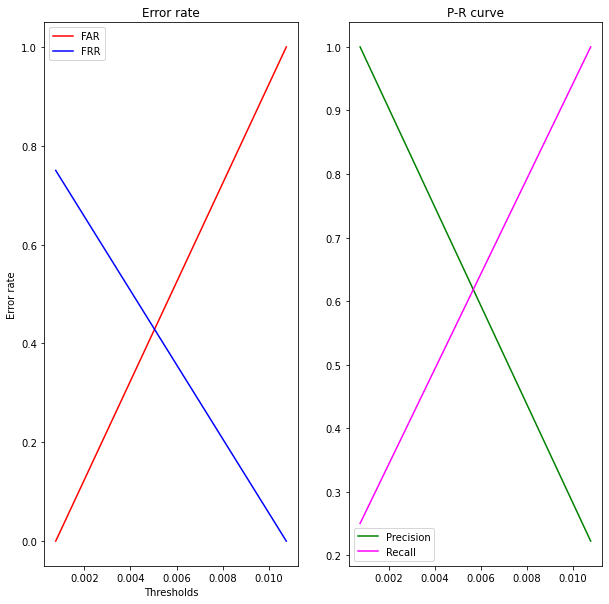

(0.625, 0.0007593231275677681)

In [32]:
acc, threshold = test_model('FashionMNIST_weights.h5')
acc, threshold

In [33]:
def predict_score():
    '''Predict distance score and classify test images as Genuine or Forged'''

    test_gen = generate_batch(orig_test, forg_test, 1)
    test_point, test_label = next(test_gen)
    img1, img2 = test_point[0], test_point[1]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")


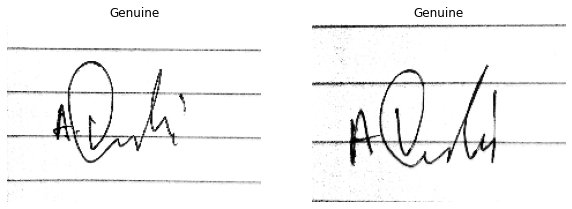

Difference Score =  0.0007593231
Its a Genuine Signature


In [34]:
predict_score()

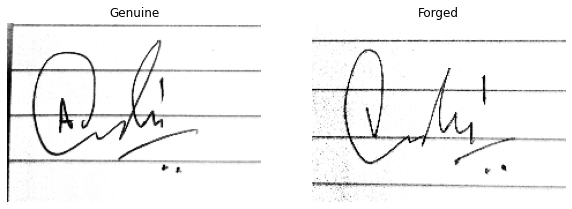

Difference Score =  0.0015707026
Its a Forged Signature


In [35]:
predict_score()

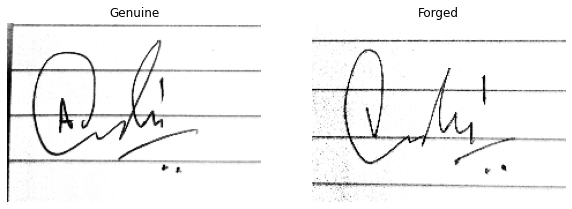

Difference Score =  0.0015707026
Its a Forged Signature


In [36]:
predict_score()

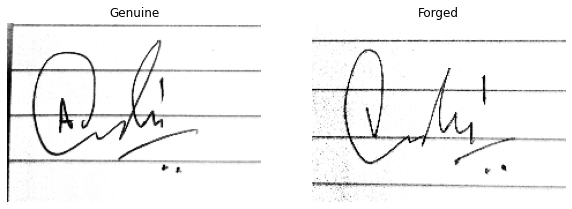

Difference Score =  0.0015707026
Its a Forged Signature


In [37]:
predict_score()